In [1]:
%cd ../utils
import importlib
import numpy as np
from pdb import pm
import pbn_parse
from pprint import pprint
import collections
import matplotlib.pyplot as plt
import CardUtils as cu
import datetime
import RandomTests

/home/thom/Documents/research/RandomBridge/utils


In [3]:
def make_graphs(ts):
    dim = ts.shape[0]
    fig, ax = plt.subplots(dim,1, figsize = (15, 100))

    for i in range(dim):
        plt.subplot(dim,1,i+1)
        plt.title(cu.feature_string[i],fontsize=16)
        plt.plot(ts[i] - cu.theoretical_probabilities[i])

def print_means(ts):
    means = np.apply_along_axis(np.mean, 1, ts)
    tp = cu.theoretical_probabilities
    print("{:22}{:^22}{:^22}{:^22}".format("Feature", "p", "p_hat", "p-p_hat"))
    for i in range(len(cu.feature_string)):
        print("{:20} {: 20.18f} {: 20.18f} {: 20.18f}".format(cu.feature_string[i], 
                                           cu.theoretical_probabilities[i], 
                                           means[i], 
                                           cu.theoretical_probabilities[i]-means[i]))

In [4]:
result = pbn_parse.get_all_files(tod=['Morning','Afternoon','Evening'])

In [5]:
days =[]
shuffles = []
for day in sorted(result.keys()):
    days.append(day)
    shuffles.append(sum((cu.get_features(deal) 
             for deal in result[day])) / len(result[day]))
shuffles = np.array(shuffles)

In [6]:
shuffles.shape

(717, 20)

In [7]:
def running_average_by_func(days,ts, date_func=lambda d1,d2 : d1.day==d2.day):
    ave = []
    for i in range(len(days)):
        j = i
        current=[]
        while(j>=0 and date_func(days[i], days[j])):
            current.append(ts[j])
            j -= 1
        ave.append(sum(current)/len(current))
    return np.array(ave)

same_day = lambda d1,d2:d1.day==d2.day
sev_day = lambda d1,d2 :(d1-d2).days<7



In [8]:
tp = cu.theoretical_probabilities

In [9]:
by_day = running_average_by_func(days, shuffles)
by_week = running_average_by_func(days, shuffles, sev_day)

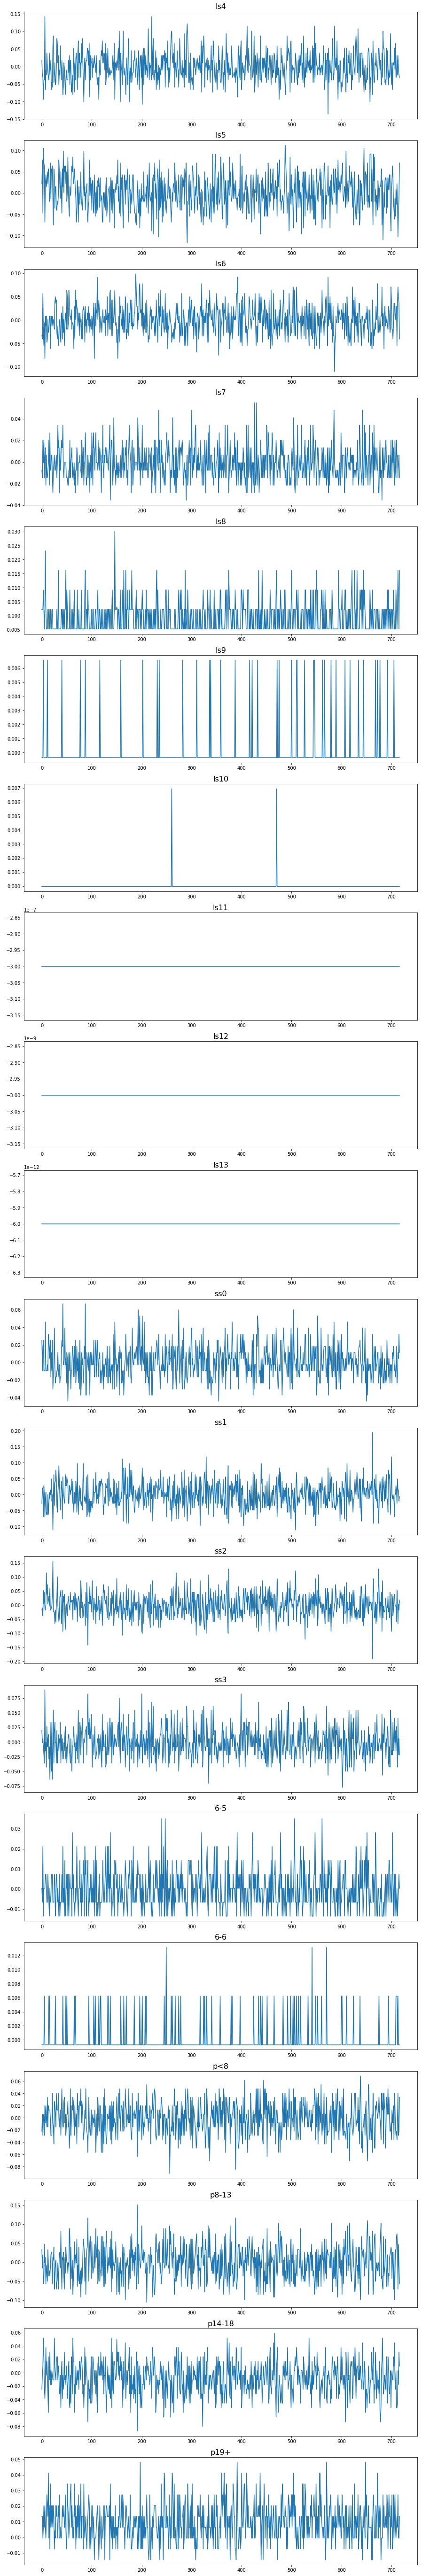

In [10]:
make_graphs(shuffles.T)

In [16]:
np.sign((shuffles-tp).T[0])/2+0.5

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0.

In [ ]:
RandomTests.word_test(np.sign)

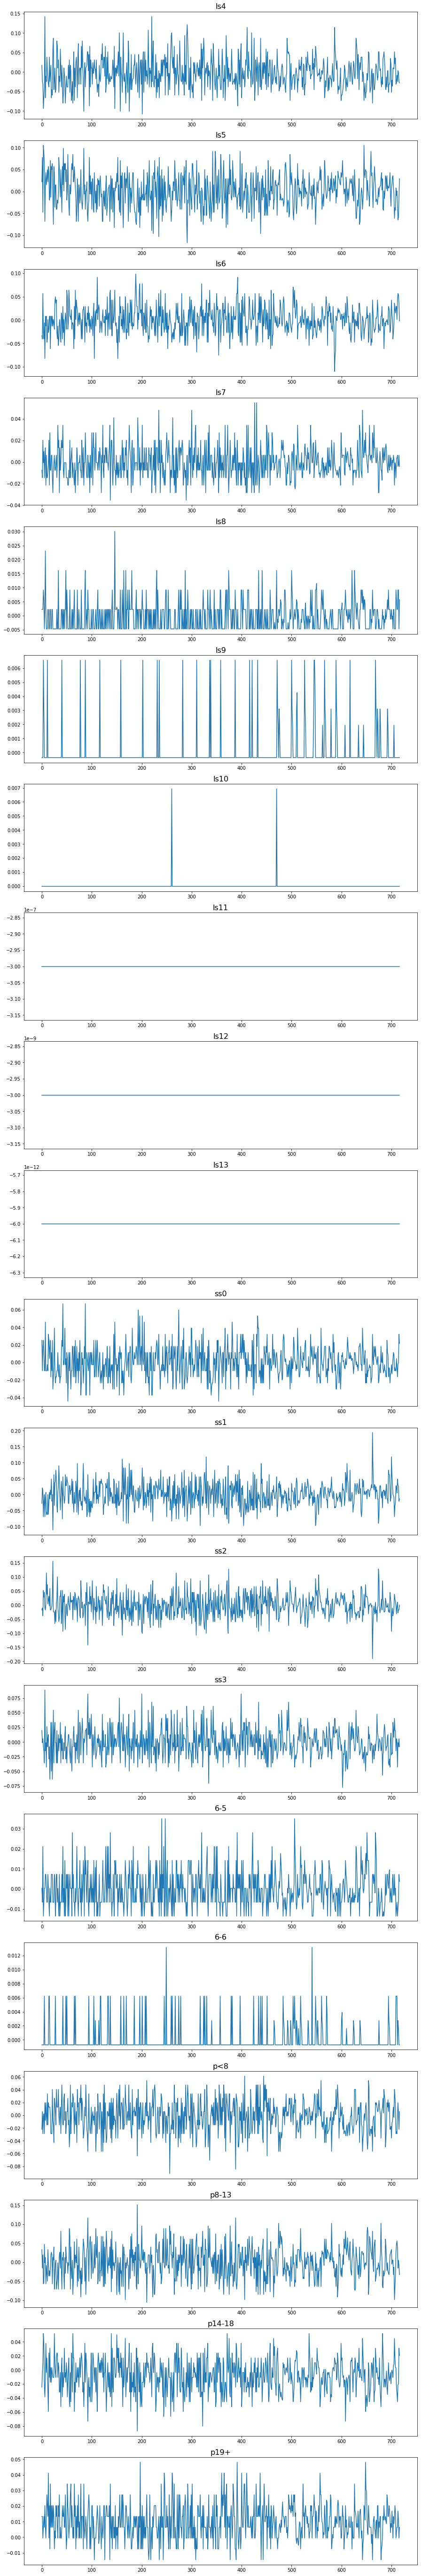

In [42]:
make_graphs(by_day.T)

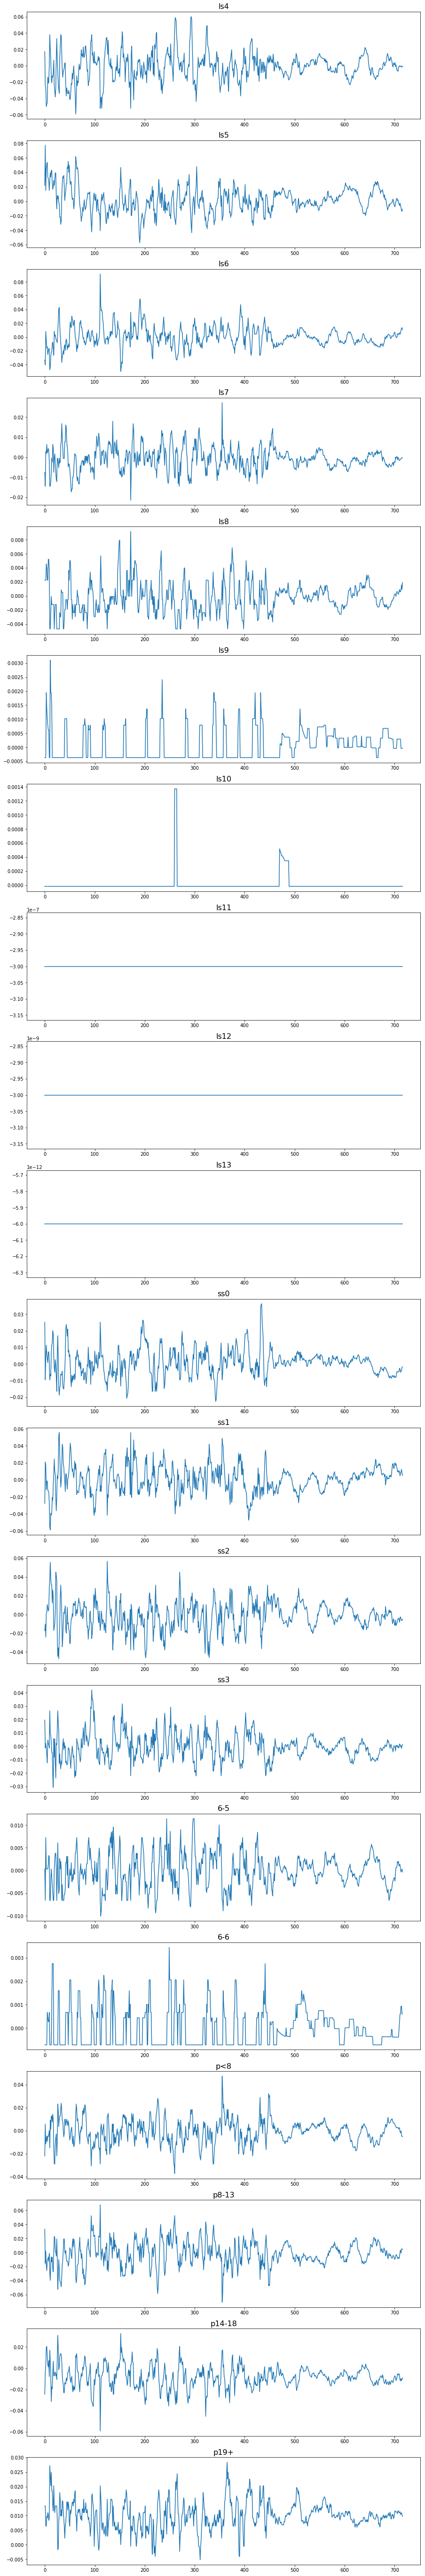

In [45]:
make_graphs(by_week.T)